In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def_2018_19 = pd.read_csv("Def_2018-19.csv")
def_2017_18 = pd.read_csv("Def_2017-18.csv")
def_2016_17 = pd.read_csv("Def_2016-17.csv")
def_2015_16 = pd.read_csv("Def_2015-16.csv")
def_2014_15 = pd.read_csv("Def_2014-15.csv")
def_2013_14 = pd.read_csv("Def_2013-14.csv")
def_2012_13 = pd.read_csv("Def_2012-13.csv")
def_2011_12 = pd.read_csv("Def_2011-12.csv")
def_2010_11 = pd.read_csv("Def_2010-11.csv")
def_2009_10 = pd.read_csv("Def_2009-10.csv")

In [3]:
Combined_DEFRTG = pd.concat([def_2018_19,def_2017_18,def_2016_17,def_2015_16,def_2014_15,def_2013_14,def_2012_13,def_2011_12,def_2010_11,def_2009_10],axis=0)

# RENAMING OLD TEAMS TO CURRENT

In [4]:
Combined_DEFRTG.index = Combined_DEFRTG['Team']
Combined_DEFRTG.rename(index = {"Charlotte Bobcats": "Charlotte Hornets"}, inplace = True)
Combined_DEFRTG.rename(index = {"LA Clippers": "Los Angeles Clippers"}, inplace = True)
Combined_DEFRTG.rename(index = {"New Jersey Nets": "Brooklyn Nets"}, inplace = True)
Combined_DEFRTG.rename(index = {"New Orleans Hornets": "New Orleans Pelicans"}, inplace = True)
Combined_DEFRTG.drop(['Team'],axis = 1,inplace=True)

In [5]:
DEF_RTG_AVG = Combined_DEFRTG.groupby(Combined_DEFRTG.index).mean()

In [6]:
DEF_RTG_AVG['Rank'] = DEF_RTG_AVG['DEFRTG'].rank().sort_values()
DEF_RTG_AVG['Acronym'] = ['ATL','BOS','BKN','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHX','POR','SAC','SAS','TOR','UTA','WAS']

In [7]:
DEF_RTG_Rank = DEF_RTG_AVG.sort_values(by='Rank')

In [8]:
def_rating = DEF_RTG_Rank[['DEFRTG', 'Rank','Acronym']]
def_rating.to_csv('tm-defrtg-avg-2009-2019.csv')

In [9]:
team_rating = DEF_RTG_AVG.drop(['Rank'],axis=1)
team_rating.to_csv('tm-avgs-2009-2019.csv')

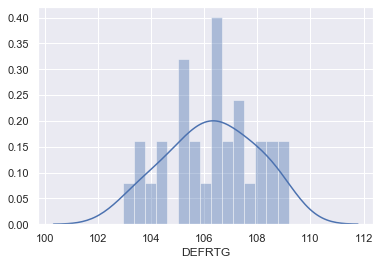

In [40]:
sns.distplot(def_rating['DEFRTG'],bins=15)

In [41]:
def_rating

,DEFRTG,Rank,Acronym
Team,,,
San Antonio Spurs,102.94,1.0,SAS
Boston Celtics,103.38,2.0,BOS
Indiana Pacers,103.73,3.0,IND
Chicago Bulls,104.13,4.0,CHI
Miami Heat,104.28,5.0,MIA
Oklahoma City Thunder,104.51,6.0,OKC
Memphis Grizzlies,105.02,7.0,MEM
Atlanta Hawks,105.28,8.0,ATL
Utah Jazz,105.37,9.0,UTA


In [58]:
def_rating.iloc[0]

DEFRTG     102.94
Rank            1
Acronym       SAS
Name: San Antonio Spurs, dtype: object

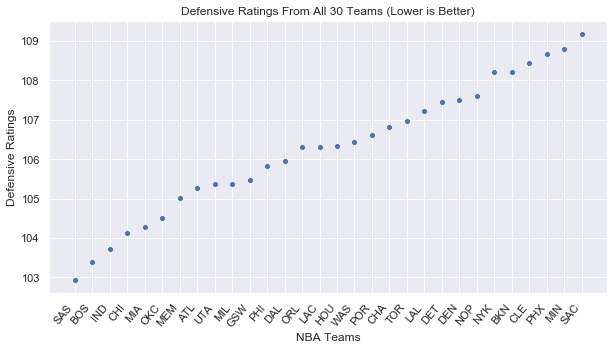

In [67]:
plt.figure(figsize=(10,5))
sns.scatterplot(def_rating['Acronym'],def_rating['DEFRTG'])
plt.xlabel("NBA Teams")
plt.ylabel("Defensive Ratings")
plt.title("Defensive Ratings From All 30 Teams (Lower is Better)")
plt.xticks(rotation=50, horizontalalignment='right')
plt.savefig('plot-nba-def-rating.png')

<BarContainer object of 30 artists>

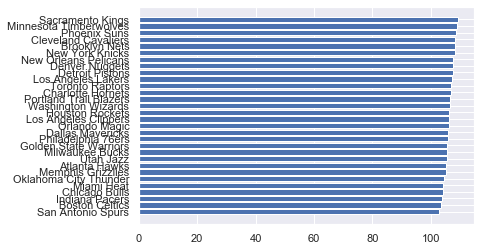

In [33]:
plt.barh(def_rating.index, def_rating['DEFRTG'])

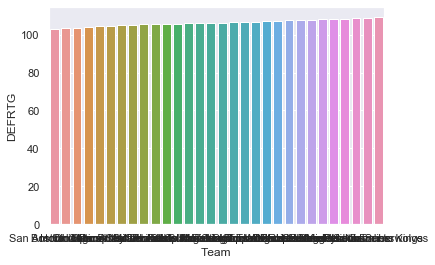

In [36]:
sns.barplot(def_rating.index, def_rating['DEFRTG'])

In [37]:
Combined_DEFRTG

,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE
Team,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,29,53,3971,107.5,113.1,-5.5,62.4,1.52,17.7,28.4,71.8,49.6,16.2,52.2,55.5,104.56,46.4
Boston Celtics,82,49,33,3956,111.3,107.0,4.3,62.4,2.05,18.8,25.7,72.8,49.5,12.7,53.4,56.7,100.43,53.0
Brooklyn Nets,82,42,40,3996,108.9,109.0,-0.1,59.2,1.58,16.9,28.2,72.0,50.1,14.6,52.0,55.6,101.51,49.2
Charlotte Hornets,82,39,43,3966,110.7,112.0,-1.3,57.8,1.90,17.0,26.8,73.1,49.5,12.2,51.4,55.4,99.18,48.6
Chicago Bulls,82,22,60,3981,104.5,112.8,-8.3,55.0,1.55,16.3,24.2,72.7,48.3,14.1,50.5,54.1,99.30,45.3
Cleveland Cavaliers,82,19,63,3951,106.8,116.8,-10.0,53.2,1.54,15.6,28.2,73.2,49.6,13.8,50.3,54.0,97.38,43.6
Dallas Mavericks,82,33,49,3956,108.7,110.1,-1.5,60.3,1.64,17.0,27.3,73.4,50.3,14.2,51.9,55.5,99.60,49.2
Denver Nuggets,82,54,28,3946,112.1,108.1,4.0,65.3,2.04,19.3,30.8,74.4,52.4,13.6,52.7,55.8,98.49,52.4
Detroit Pistons,82,41,41,3971,108.4,108.7,-0.3,57.9,1.63,16.5,29.1,74.5,50.9,14.0,50.9,54.4,97.88,48.2
